In [1]:
import pandas as pd

In [2]:
import seaborn as sb

In [3]:
import matplotlib as mplot

In [4]:
import numpy as np

In [5]:
data = pd.read_csv('fb_download.csv', header=0, low_memory=False)#dtype = object) #can use dtype = object to cast all without using high memory mode

In [6]:
data = data.drop_duplicates()

In [7]:
data.head()

,order_id,name,price,type,id,quantity,tax,order_id.1,total,original_subtotal,...,vendor_id,vendor_name,venue_name,payment_type,order_date,processed_date,event_date,event_name,event_time,season_name
0,745919246.0,IT Test,0.01,FOOD,NaN,1,0.00,745919246.0,0.01,0.01,...,Wolfie's Hot Chicken,Wolfies,BMO Stadium,appetize,51:39.0,2/20/2024,NaN,NaN,NaN,NaN
1,143971.0,Cotton Candy Bag,10.00,SNACKS,9710051,1,0.95,143971.0,10.95,10.95,...,Vending Com NE,Vending Com NE,BMO Stadium,venuenext_v2,12:00.0,3/25/2024,3/23/2024,LAFC v. Nashville - 2024,30:00.0,2024 Regular Season
2,90766.0,"Draft, Modelo 20oz",19.00,BEER,9710748,1,1.81,90766.0,104.05,121.15,...,Field Club Bar,Field Club Bar,BMO Stadium,venuenext_v2,50:51.0,8/26/2024,8/24/2024,Kane Brown,30:00.0,2024 Non-MLS Events
3,333784.0,"Draft, Pacifico 20oz",15.50,BEER,9710737,1,1.47,333784.0,33.94,33.94,...,Portable 302B Draft Beer,Portable 302B Draft Beer,BMO Stadium,venuenext_v2,33:57.0,11/24/2024,11/23/2024,2024 Playoff - Western Conference Semifinal,30:00.0,2024 MLS Playoffs
4,136685.0,"Can, Modelo 24oz",15.75,BEER,9710744,1,1.50,136685.0,28.20,28.20,...,Vending Com NE,Vending Com NE,BMO Stadium,venuenext_v2,32:27.0,6/24/2024,6/22/2024,LAFC v. San Jose 1- 2024,30:00.0,2024 Regular Season


In [8]:
pd.set_option('display.max_columns', None)

In [9]:
data.event_date = pd.to_datetime(data['event_date'])

In [10]:
data.processed_date = pd.to_datetime(data['processed_date'])
# take care of the two fields above to test process_date backfill of NaN event_date

In [11]:
data = data[data.name!='IT Test']

In [12]:
data = data[data.name!='Test']

In [13]:
data = data.drop(columns='order_id.1')

In [14]:
data = data[data.name!='Test']

In [15]:
data = data[data.name!='Test']

In [16]:
str_cols = list(data.select_dtypes('object').columns)

In [17]:
str_cols

['name',
 'type',
 'id',
 'status',
 'vendor_id',
 'vendor_name',
 'venue_name',
 'payment_type',
 'order_date',
 'event_name',
 'event_time',
 'season_name']

In [18]:
data[str_cols] = data[str_cols].apply(lambda x: x.str.strip())
# trim leading/trailing whitespaces from str cols

In [19]:
data.isna().corr()
# create NaN correlation table
# notes on NaN correlations:\
#   --> event_date, event_name, event_time, season_name all null together\
#   --> total and order_subtotal null together\
#   --> type has nulls but seems to be avoidable using a mapping table\
#   --> other Nan cols needs a bit more research.\
#   ----> Event_date type cols are Nan about 0.76% percent of the time.\
#   ------> If not able to isolate cases, inquire what sort of data fill might be most appropiate\
#   ------> Interestingly, processed date is never NaN with event_date cols. Let's see if we can back into our other fields from processed_date\

,order_id,name,price,type,id,quantity,tax,total,original_subtotal,status,vendor_id,vendor_name,venue_name,payment_type,order_date,processed_date,event_date,event_name,event_time,season_name
order_id,1.000000,NaN,NaN,-0.000065,NaN,NaN,NaN,0.007712,0.007712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000146,-0.000146,-0.000146,-0.000146
name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,-0.000065,NaN,NaN,1.000000,NaN,NaN,NaN,0.002756,0.002756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003290,-0.003290,-0.003290,-0.003290
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total,0.007712,NaN,NaN,0.002756,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009224,0.009224,0.009224,0.009224
original_subtotal,0.007712,NaN,NaN,0.002756,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009224,0.009224,0.009224,0.009224
status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='Frequency'>

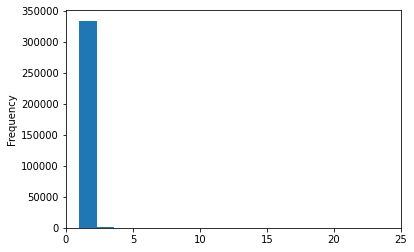

In [20]:
processed_date_event_date_diff = (
    data[data.event_date.notna()].processed_date
    - data[data.event_date.notna()].event_date
).dt.days.astype(int)


processed_date_event_date_diff.plot.hist(bins=300,xlim=(0,25))

In [21]:
# quick distribution of differences (in days) between event_date and processed_date

In [22]:
len(processed_date_event_date_diff[processed_date_event_date_diff == 1]) / len(processed_date_event_date_diff)

0.3174855934015756

In [23]:
len(processed_date_event_date_diff[processed_date_event_date_diff == 2]) / len(processed_date_event_date_diff)

0.6487940073174538

In [24]:
#Most purchases are processed a day or two after the event, but unfortunately we can't use this to back into event_date for NaN event_date purchasess without more work. One example attempt could be to incorporate other data sources and compare BMO schedule to processed dates; however, for an issue affecting 0.7% of rows I am ok ditching rows for the purposes of this take-home

In [25]:
data.payment_type.unique()

array(['venuenext_v2'], dtype=object)

In [26]:
data.venue_name.unique()

array(['BMO Stadium'], dtype=object)

In [27]:
#suggest dropping payment_type and venue_name from columns for analysis but keeping it in the data source is likely best practice for use with other data sources

In [28]:
data = data.drop(columns = ['payment_type', 'venue_name'])

In [29]:
nan_type_array = data[data.type.isna()].name.unique()
nan_type_array

array(['Twisted Transitor - Specialty Cocktail ($22)',
       'All Inclusive Hindsight Sauv Blanc',
       'Gran Centarito - Specialty Cocktail',
       'Freak on a Leash - Specialty Cocktail ($22)',
       'All Inclusive Boen Chardonnay Glass', 'Can, Dos XX 24 oz',
       'Strawberry Margarita', 'All Inclusive Fini Pinot Grigio',
       'Service Charge', 'Cherry Pie Pinot Noir Glass',
       'Veuve Clicquot “Yellow Label” Brut, Champagne - BY THE BOTTLE',
       'Draft, Heineken 24oz', 'Sweet Mirage',
       'BELLE GLOS PINOT NOIR 2021', 'Shaboom - Specialty Cocktail',
       'Chili Bean - ADD ON', 'Clos Pegase Merlot Glass POS MENU ITEM',
       'Heineken Silver 12oz', 'Makers Mark, Single Call',
       '$3 BREAST CANCER ASSOCIATION DONATION', '$1 MAUI Relief Fund',
       'Celebration Birthday Cake', '$5 MAUI Relief Fund',
       'Candy, Skittles', 'Diora Sparkling Rose'], dtype=object)

In [30]:
# showing all unique Name values for rows where type is Nan. Need to figure out if these are consistent to some condition or if I can create a mapping table

In [31]:
data[data.name.isin(nan_type_array)]

,order_id,name,price,type,id,quantity,tax,total,original_subtotal,status,vendor_id,vendor_name,order_date,processed_date,event_date,event_name,event_time,season_name
48,96363.0,Shaboom - Specialty Cocktail,21.0,SPECIALTY COCKTAILS,9710855,1,2.00,23.0001,26.15,completed,Field Concert Bar,Field Concert Bar,31:35.0,2024-07-23,2024-07-21,ATEEZ - Night 2,30:00.0,2024 Non-MLS Events
59,345495.0,Shaboom - Specialty Cocktail,21.0,SPECIALTY COCKTAILS,9710855,1,2.00,46.0000,46.00,completed,Field Concert Bar,Field Concert Bar,28:17.0,2024-07-23,2024-07-21,ATEEZ - Night 2,30:00.0,2024 Non-MLS Events
342,333543.0,Shaboom - Specialty Cocktail,21.0,SPECIALTY COCKTAILS,9710855,1,2.00,23.0000,23.00,completed,Field Concert Bar,Field Concert Bar,46:49.0,2024-07-22,2024-07-20,ATEEZ - Night 1,30:00.0,2024 Non-MLS Events
489,12373.0,Twisted Transitor - Specialty Cocktail ($22),22.0,NaN,9710912,1,2.09,44.9000,51.05,completed,110 South Bar,110 South Bar,35:11.0,2024-10-06,2024-10-05,KoRn,00:00.0,2024 Non-MLS Events
638,309320.0,Gran Centarito - Specialty Cocktail,18.0,SPECIALTY COCKTAILS,9710650,1,1.71,19.7100,19.71,completed,Port 19 - POS,Port 19 - POS,52:31.0,2024-07-28,2024-07-26,Leagues Cup: LAFC v. Tijuana - 2024,00:00.0,2024 Leagues Cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376560,221196.0,"Can, Dos XX 24 oz",14.5,BEER,9710003,1,1.38,41.0800,41.08,completed,Portable 305 Micheladas,Portable 305 Micheladas,22:15.0,2024-04-07,2023-09-27,Campeones Cup: LAFC v. Tigres,00:00.0,2023 Leagues Cup/Campeones
376816,104136.0,"Can, Dos XX 24 oz",23.0,BEER,9710003,1,2.19,50.3800,60.46,completed,Vending Com NE,Vending Com NE,59:57.0,2024-08-08,NaT,NaN,NaN,NaN
376954,65078.0,Gran Centarito - Specialty Cocktail,18.0,"LIQUOR,SPECIALTY COCKTAILS",9710650,1,1.71,27.1000,30.81,completed,110 North Bar,110 North Bar,34:43.0,2024-08-23,2024-08-21,Leagues Cup: LAFC v. Colorado - 2024,00:00.0,2024 Leagues Cup
377160,3900.0,Gran Centarito - Specialty Cocktail,18.0,"LIQUOR,SPECIALTY COCKTAILS",9710650,1,1.71,39.4200,39.42,completed,110 South Bar,110 South Bar,10:04.0,2024-08-23,2024-08-21,Leagues Cup: LAFC v. Colorado - 2024,00:00.0,2024 Leagues Cup


In [32]:
# now need to check if there is one Type per Name

In [33]:
data.type.unique()

array(['SNACKS', 'BEER', 'FOOD', 'LIQUOR', 'BEER,SPEED BAR',
       'N/A BEVERAGE', 'LIQUOR,TEQUILA', 'LIQUOR,SPECIALTY COCKTAILS',
       'FOOD,SPEED BAR', 'DESSERTS', 'SPECIALTY COCKTAILS',
       'LIQUOR,SPEED BAR', 'TEQUILA', 'CANDY', 'WINE',
       'LIQUOR,SPEED BAR,TEQUILA', nan, 'ALL INCLUSIVE',
       'N/A BEVERAGE,SPECIALTY COCKTAILS', 'SPECIALS', 'BEER,SPECIALS',
       'N/A BEVERAGE,SPEED BAR'], dtype=object)

In [34]:
data['type_tags'] = data.type.str.split(n=4)
# make type into a list of tags for multi-type Name values

In [35]:
data['speed_bar_bool'] = data.type.str.contains('SPEED BAR')

In [36]:
data[data.type.notna()].groupby('vendor_id')['speed_bar_bool'].agg(list)#.apply(lambda x: max(x))

vendor_id
110 North Bar                    [False, False, True, False, False, False, Fals...
110 South Bar                    [False, False, False, False, False, False, Fal...
Beer Garden                      [False, False, False, False, False, False, Fal...
Black & Gold Taqueria            [False, False, False, False, False, False, Fal...
Caulipower Corner                [False, False, False, False, False, False, Fal...
City View                        [False, False, False, False, True, False, Fals...
Directors Box                    [False, False, False, False, False, False, Fal...
Directors Lounge                 [False, False, False, False, False, False, Fal...
East Los Eats                    [False, False, False, False, False, False, Fal...
FIELDS LA BAR                    [True, False, False, False, False, False, Fals...
FIELDS LA FOOD                   [False, False, False, False, False, False, Fal...
Field Club Bar                   [False, False, False, False, False, False, F

In [37]:
# shows us that the speed bar type tag is not exclusive and/or fixed to specific vendor_id's

In [38]:
# create mapping table for NaN values in Type
# making a type dict for names with NaN type

In [39]:
data.groupby('name')['type'].agg(lambda x: list(set(x)))

name
$1 MAUI Relief Fund                                                       [nan]
$10 DOS EQUIS                                                            [BEER]
$10 HEINEKEN                                                             [BEER]
$3 BREAST CANCER ASSOCIATION DONATION                                     [nan]
$5 DOS EQUIS                                                             [BEER]
                                                          ...                  
Yerba Mate Peach Revival                 [N/A BEVERAGE, N/A BEVERAGE,SPEED BAR]
Yerba Matelada                                                           [BEER]
YerbaMate Specialty Drink                                              [LIQUOR]
You're The One - Mocktail                                        [N/A BEVERAGE]
Yucca Fries                                                              [FOOD]
Name: type, Length: 705, dtype: object

In [40]:
data[data.type.str.find(',')>0].type

8                     BEER,SPEED BAR
10                    LIQUOR,TEQUILA
12        LIQUOR,SPECIALTY COCKTAILS
17                    FOOD,SPEED BAR
27                    BEER,SPEED BAR
                     ...            
377411                FOOD,SPEED BAR
377423                BEER,SPEED BAR
377426      LIQUOR,SPEED BAR,TEQUILA
377441      LIQUOR,SPEED BAR,TEQUILA
377446    LIQUOR,SPECIALTY COCKTAILS
Name: type, Length: 16651, dtype: object

In [41]:
# no cases where subtotal and total fields are Nan and the other isn't

In [42]:
# find dup order_id rows

In [43]:
data.groupby('id')['id'].agg('count').value_counts

<bound method IndexOpsMixin.value_counts of id
22710001      2
22710003    144
22710004    142
24710001      5
24710002      1
           ... 
9710939     114
9710940       3
9710941     446
9710943      80
VN0003        3
Name: id, Length: 544, dtype: int64>

In [44]:
# Group by 'Id' and calculate sum and mean of 'Value'
dict(data.groupby('id')['name'].agg(pd.Series.mode))

{'22710001': 'Bloody Mary - Tailgate Special',
 '22710003': 'All Inclusive Sea Sun Chardonnay',
 '22710004': 'All Inclusive Sea Sun Pinot Noir',
 '24710001': "Reese's Pieces",
 '24710002': "M&M's",
 '9290001': 'BEATBOX Frozen Cocktail - Fruit Punch',
 '9310002': 'Can, Coors Light 24oz',
 '9700001': 'Draft, Golden Road Street Cart 20oz',
 '9710001': 'Pepsi 20oz',
 '9710002': '1800 Las Margaritas',
 '9710003': 'Can, Dos XX 24 oz',
 '9710004': 'Can, Firestone 805 24oz',
 '9710005': 'Can, Truly Fruit Punch Hard Seltzer 24oz',
 '9710006': 'Can, Heineken 24oz',
 '9710008': 'Can, Tecate Alta 24oz',
 '9710009': 'Draft, Dos XX Lager 24 oz',
 '9710010': 'BBQ Brisket Loaded Fries',
 '9710011': 'Draft, Firestone 805 20 oz',
 '9710013': 'Beer, Draft Heineken 24 oz',
 '9710015': 'Draft, Lagunitas IPA 20 oz',
 '9710017': 'Draft, Tecate Alta 20 oz',
 '9710019': 'Can, Party Beer - Hazy IPA 19.2oz',
 '9710020': 'Loaded Hot Dog',
 '9710021': 'Can, Party Beer - IPA 19.2oz',
 '9710023': 'Can, PBC Pilsner 1

In [45]:
# '9710908' refers to both 'Yerba Matelada' and 'YerbaMate Specialty Drink', needs to be disambiguated

In [46]:
data[data.id=='9710027']

,order_id,name,price,type,id,quantity,tax,total,original_subtotal,status,vendor_id,vendor_name,order_date,processed_date,event_date,event_name,event_time,season_name,type_tags,speed_bar_bool
325771,98282.0,"Candy, Skittles",5.5,NaN,9710027,1,0.0,29.59,33.71,completed,Figueroa Club,Figueroa Club,23:55.0,2024-11-03,2024-11-02,Grupo Firme,00:00.0,2024 Non-MLS Events,NaN,NaN


In [47]:
# '9710027' refers to Candy, Skittles. Can be adjusted to fit with Candy, Skittles Original

In [48]:
data[data.id=='9710027']

,order_id,name,price,type,id,quantity,tax,total,original_subtotal,status,vendor_id,vendor_name,order_date,processed_date,event_date,event_name,event_time,season_name,type_tags,speed_bar_bool
325771,98282.0,"Candy, Skittles",5.5,NaN,9710027,1,0.0,29.59,33.71,completed,Figueroa Club,Figueroa Club,23:55.0,2024-11-03,2024-11-02,Grupo Firme,00:00.0,2024 Non-MLS Events,NaN,NaN


In [49]:
id_to_type_map = dict(data.groupby('id')['type'].agg(pd.Series.mode))

In [50]:
name_to_type_map = dict(data.groupby('name')['type'].agg(pd.Series.mode))

In [51]:
# create basic mapping table to bridge gap for NaN types with Id or Name

In [52]:
name_to_type_map['$1 MAUI Relief Fund'] = 'Donation'
name_to_type_map['$5 MAUI Relief Fund'] = 'Donation'
name_to_type_map['$3 BREAST CANCER ASSOCIATION DONATION'] = 'Donation'
name_to_type_map['Clos Pegase Merlot Glass POS MENU ITEM'] = 'WINE'
name_to_type_map['Diora Sparkling Rose'] = 'WINE'
name_to_type_map['Freak on a Leash - Specialty Cocktail ($22)'] = 'SPECIALTY COCKTAILS'
name_to_type_map['Twisted Transitor - Specialty Cocktail ($22)'] = 'SPECIALTY COCKTAILS'
name_to_type_map['Makers Mark, Single Call'] = 'LIQUOR'
name_to_type_map['Service Charge'] = 'Service Charge'
name_to_type_map['Strawberry Margarita'] = 'LIQUOR'
name_to_type_map['Veuve Clicquot “Yellow Label” Brut, Champagne - BY THE BOTTLE'] = 'WINE'
name_to_type_map['All Inclusive Boen Chardonnay Glass'] = 'WINE'
name_to_type_map['All Inclusive Fini Pinot Grigio'] = 'WINE'
name_to_type_map['All Inclusive Hindsight Sauv Blanc'] = 'WINE'
name_to_type_map['Candy, Skittles'] = 'CANDY'
name_to_type_map['Chili Bean - ADD ON'] = 'FOOD'
name_to_type_map['Celebration Birthday Cake'] = 'FOOD'


In [53]:
# manually patch some holes in the map

In [54]:
name_to_type_map

{'$1 MAUI Relief Fund': 'Donation',
 '$10 DOS EQUIS': 'BEER',
 '$10 HEINEKEN': 'BEER',
 '$3 BREAST CANCER ASSOCIATION DONATION': 'Donation',
 '$5 DOS EQUIS': 'BEER',
 '$5 MAUI Relief Fund': 'Donation',
 '$AD BOYZ - Specialty Cocktail': 'LIQUOR,SPECIALTY COCKTAILS',
 '10% - Specialty Cocktail': 'LIQUOR',
 '12oz Soda': 'N/A BEVERAGE',
 '16oz Draft HH MODELO/PACIFCO': 'BEER',
 '1800 - Las Margaritas': 'LIQUOR',
 '1800 Anejo, Single Super Premium': 'LIQUOR,TEQUILA',
 '1800 Black & Gold Margarita': 'LIQUOR',
 '1800 Black & Gold Margartia': 'LIQUOR',
 '1800 Classic Margarita': 'LIQUOR',
 '1800 Cristalino, Double Premium': 'LIQUOR',
 '1800 Cristalino, Single Premium': 'LIQUOR',
 '1800 Cristalino, Single Premium POS MENU ITEM': 'LIQUOR',
 '1800 Frozen Lime Margarita': 'LIQUOR',
 '1800 Frozen Strawberry Margarita': 'LIQUOR',
 '1800 Guachimonton - 1oz': 'LIQUOR',
 '1800 Guachimonton, Single Super Premium': 'LIQUOR',
 '1800 Las Margaritas': 'LIQUOR',
 '1800 Las Margaritas (Call)': 'LIQUOR',
 '180

In [55]:
id_to_type_map

{'22710001': 'LIQUOR',
 '22710003': 'ALL INCLUSIVE',
 '22710004': 'ALL INCLUSIVE',
 '24710001': 'FOOD',
 '24710002': 'FOOD',
 '9290001': 'WINE',
 '9310002': 'BEER',
 '9700001': 'BEER',
 '9710001': 'N/A BEVERAGE',
 '9710002': 'LIQUOR',
 '9710003': 'BEER',
 '9710004': 'BEER',
 '9710005': 'BEER',
 '9710006': 'BEER',
 '9710008': 'BEER',
 '9710009': 'BEER',
 '9710010': 'FOOD',
 '9710011': 'BEER',
 '9710013': 'BEER',
 '9710015': 'BEER',
 '9710017': 'BEER',
 '9710019': 'BEER',
 '9710020': 'FOOD',
 '9710021': 'BEER',
 '9710023': 'BEER',
 '9710024': 'CANDY',
 '9710026': 'CANDY',
 '9710027': array([], dtype=object),
 '9710028': 'N/A BEVERAGE',
 '9710029': 'N/A BEVERAGE',
 '9710030': 'N/A BEVERAGE',
 '9710031': 'N/A BEVERAGE',
 '9710032': 'N/A BEVERAGE',
 '9710034': 'BEER',
 '9710035': 'BEER',
 '9710037': 'BEER',
 '9710038': 'BEER',
 '9710039': 'N/A BEVERAGE',
 '9710041': 'N/A BEVERAGE',
 '9710042': 'CANDY',
 '9710044': 'BEER',
 '9710045': 'BEER',
 '9710046': 'LIQUOR',
 '9710048': 'FOOD',
 '97100

In [56]:
# id_to_type_map doesn't seem to work super well, removing

In [57]:
data['type_mapped_from_id'] = data.id.map(id_to_type_map)

In [58]:
data['type_mapped_from_id'] = data['type_mapped_from_id'].replace([], np.NaN)

In [59]:
data.head()

,order_id,name,price,type,id,quantity,tax,total,original_subtotal,status,vendor_id,vendor_name,order_date,processed_date,event_date,event_name,event_time,season_name,type_tags,speed_bar_bool,type_mapped_from_id
1,143971.0,Cotton Candy Bag,10.00,SNACKS,9710051,1,0.95,10.95,10.95,completed,Vending Com NE,Vending Com NE,12:00.0,2024-03-25,2024-03-23,LAFC v. Nashville - 2024,30:00.0,2024 Regular Season,[SNACKS],False,SNACKS
2,90766.0,"Draft, Modelo 20oz",19.00,BEER,9710748,1,1.81,104.05,121.15,completed,Field Club Bar,Field Club Bar,50:51.0,2024-08-26,2024-08-24,Kane Brown,30:00.0,2024 Non-MLS Events,[BEER],False,BEER
3,333784.0,"Draft, Pacifico 20oz",15.50,BEER,9710737,1,1.47,33.94,33.94,completed,Portable 302B Draft Beer,Portable 302B Draft Beer,33:57.0,2024-11-24,2024-11-23,2024 Playoff - Western Conference Semifinal,30:00.0,2024 MLS Playoffs,[BEER],False,BEER
4,136685.0,"Can, Modelo 24oz",15.75,BEER,9710744,1,1.50,28.20,28.20,completed,Vending Com NE,Vending Com NE,32:27.0,2024-06-24,2024-06-22,LAFC v. San Jose 1- 2024,30:00.0,2024 Regular Season,[BEER],False,BEER
5,8402.0,Chicken Tenders & Fries,14.00,FOOD,9710062,1,1.33,40.79,40.79,completed,East Los Eats,East Los Eats,48:23.0,2024-03-19,2024-03-17,Angel City FC vs. Bay FC,30:00.0,2024 Angel City Season,[FOOD],False,FOOD


In [60]:
data['type_mapped_from_id'].value_counts()

type_mapped_from_id
BEER                          130633
FOOD                           68718
N/A BEVERAGE                   65273
LIQUOR                         46497
SNACKS                         12202
DESSERTS                        8110
CANDY                           3939
SPECIALTY COCKTAILS             3741
LIQUOR,SPECIALTY COCKTAILS      3219
ALL INCLUSIVE                   2928
WINE                            1649
TEQUILA                         1053
LIQUOR,TEQUILA                   216
[]                               155
[]                               123
[]                                26
[]                                23
[]                                21
[]                                17
[]                                13
[]                                 7
[]                                 7
[BEER, LIQUOR]                     6
[]                                 4
[]                                 3
[]                                 3
[]                

In [61]:
# We're left with a few missing values still but it's a tiny tiny percent of total and, for the purpose of this example and time, sufficient

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348594 entries, 1 to 377486
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             348593 non-null  float64       
 1   name                 348594 non-null  object        
 2   price                348594 non-null  float64       
 3   type                 348087 non-null  object        
 4   id                   348594 non-null  object        
 5   quantity             348594 non-null  int64         
 6   tax                  348594 non-null  float64       
 7   total                332554 non-null  float64       
 8   original_subtotal    332554 non-null  float64       
 9   status               348594 non-null  object        
 10  vendor_id            348594 non-null  object        
 11  vendor_name          348594 non-null  object        
 12  order_date           348594 non-null  object        
 13  processed_date     

In [63]:
compression_opts = dict(method='zip', archive_name='fb_clean.csv')

In [64]:
data.to_csv('fb_clean.zip', index=False, compression=compression_opts)